--- Корреляция с уровнем образования ---
education_level_MGR        0.018979
education_level_Unknown    0.010322
education_level_GRD        0.000537
education_level_UGR       -0.000741
education_level_ACD       -0.002326
education_level_PGR       -0.009033
education_level_SCH       -0.011895
Name: target_is_tariff, dtype: float64


C:\Temp\ipykernel_8356\1221618313.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


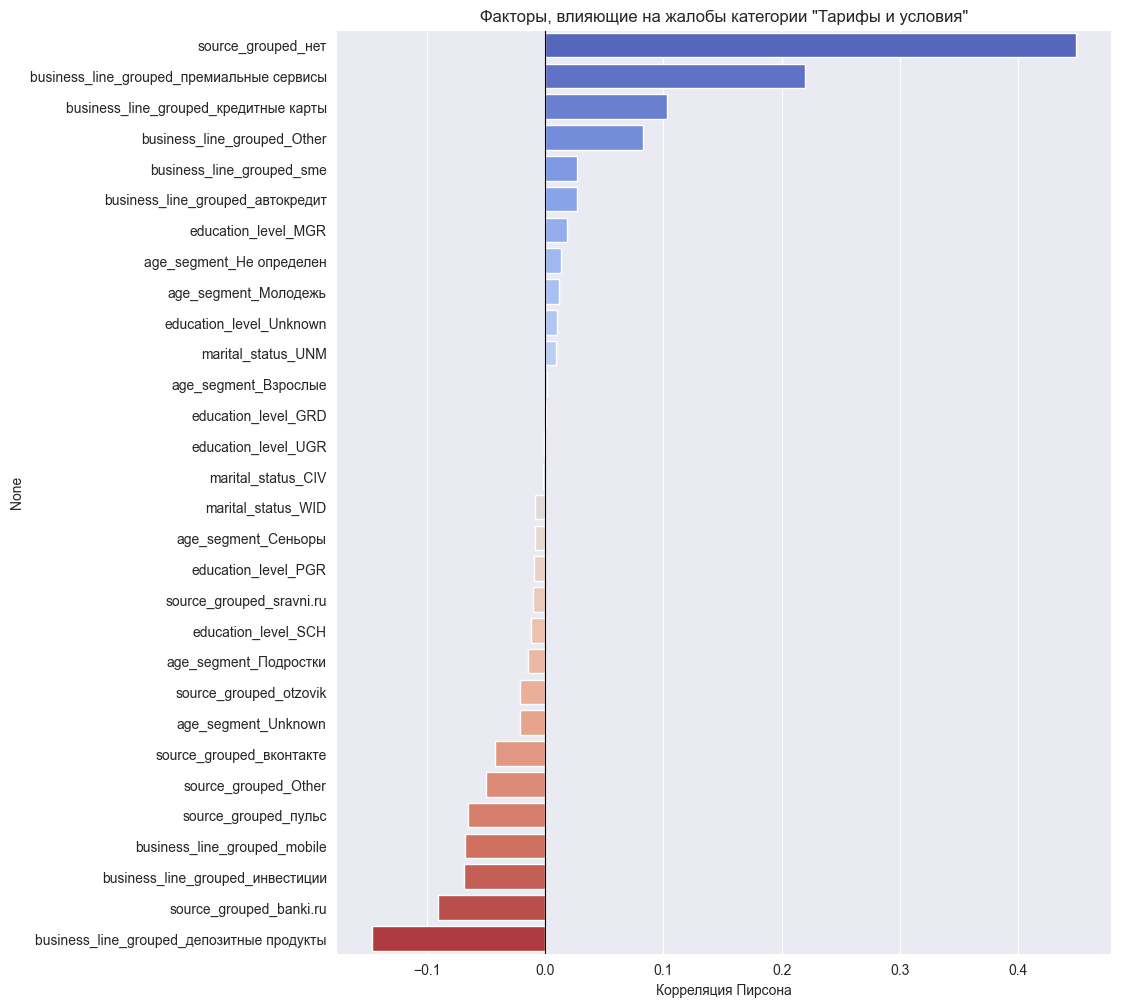

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dfc.csv')
negative_reviews = df[df['review_emotion'] == 0].copy()

negative_reviews['review_theme'] = negative_reviews['review_theme'].astype(str).str.strip()
negative_reviews['target_is_tariff'] = negative_reviews['review_theme'].str.lower().str.contains('тарифы и условия').astype(int)

top_lines = ['депозитные продукты', 'кредитные карты', 'инвестиции', 'автокредит', 'mobile', 'sme', 'премиальные сервисы']
top_sources = ['banki.ru', 'пульс', 'нет', 'otzovik', 'sravni.ru', 'вконтакте']

negative_reviews['business_line_grouped'] = negative_reviews['business_line'].apply(lambda x: x if x in top_lines else 'Other')
negative_reviews['source_grouped'] = negative_reviews['review_source'].apply(lambda x: x if x in top_sources else 'Other')

negative_reviews['education_level'] = negative_reviews['education_level_cd'].fillna('Unknown')
negative_reviews['marital_status'] = negative_reviews['marital_status_cd'].fillna('Unknown')
negative_reviews['age_segment'] = negative_reviews['age_segment'].fillna('Unknown')

features = ['business_line_grouped', 'source_grouped', 'education_level', 'marital_status', 'age_segment']
df_encoded = pd.get_dummies(negative_reviews[features], drop_first=False)

df_encoded['target_is_tariff'] = negative_reviews['target_is_tariff']

corr_series = df_encoded.corr()['target_is_tariff'].sort_values(ascending=False)
corr_series = corr_series.drop('target_is_tariff')

print("--- Корреляция с уровнем образования ---")
print(corr_series[corr_series.index.str.contains('education')])

plt.figure(figsize=(10, 12))
top_corr = pd.concat([corr_series.head(15), corr_series.tail(15)])
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title('Факторы, влияющие на жалобы категории "Тарифы и условия"')
plt.xlabel('Корреляция Пирсона')
plt.axvline(0, color='black', linewidth=0.8)
plt.show()